<a href="https://colab.research.google.com/github/andrybrew/IHT-SEM1302-30Okt/blob/main/practice_material/sentiment_analysis_vader_english.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis: VADER (English)**

##**Importing required libraries**

In [1]:
# Import the necessary libraries
import requests
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns

##**Importing Dataset**

In [4]:
# Fetching the dataset from GitHub
data_url = "https://raw.githubusercontent.com/andrybrew/IHT-SEM1302-30Okt/main/data/002_cbdc.csv"

# Using pandas read_csv function to load the data from the URL directly into a DataFrame
df_comment = pd.read_csv(data_url)

##**Data Preprocessing for Sentiment Analysis**

In [5]:
# Remove mentions entirely
df_comment['comment'] = df_comment['comment'].str.replace('@\S+', '', regex=True)

# Remove non-word characters except for spaces
df_comment['comment'] = df_comment['comment'].str.replace('[^\w\s]', '', regex=True)

# Convert to lowercase
df_comment['comment'] = df_comment['comment'].str.lower()

# Trim leading and trailing spaces and replace multiple spaces with a single space
df_comment['comment'] = df_comment['comment'].str.strip().str.replace('\s+', ' ', regex=True)

## **Performing Sentiment Analysis**



In [43]:
# Download the corpus
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [44]:
# Create a vader sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Create a list of sentences
sentences = df_comment['comment']

# Calculate the compound sentiment score of each sentence
scores = [sia.polarity_scores(sentence)['compound'] for sentence in sentences]

<ipython-input-45-d54339c306e4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=scores)


<Axes: ylabel='Density'>

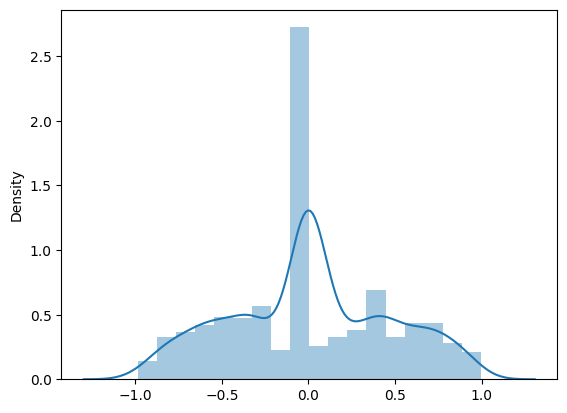

In [45]:
# Visualize the compound sentiment using seaborn
sns.distplot(x=scores)

In [46]:
# Store the sentiment scores in a new column 'sentiment_score' in df_comment
df_comment['sentiment_score'] = scores

In [ ]:
# Define a function to categorize sentiment based on the score
def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Applying the function to the sentiment_score column
df_comment['sentiment'] = df_comment['sentiment_score'].apply(categorize_sentiment)

In [47]:
# Show the result
df_comment[['comment', 'sentiment_score', 'sentiment']]

,comment,sentiment_score,sentiment
0,digital fiat money what else does the world ne...,0.5106,Positive
1,if it is launched by wb and imf then it is not...,0.5423,Positive
2,first they are destroying our tangible money t...,-0.2960,Negative
3,can an individual buy cbdc,0.0000,Neutral
4,we will all be slaves,0.0000,Neutral
...,...,...,...
1698,thank you,0.3612,Positive
1699,until people figure out well down the line the...,0.2732,Positive
1700,inflation will stop it dead in its tracks like...,-0.3818,Negative
1701,unfortunately we cant just prepare how to live...,-0.3400,Negative


<Axes: xlabel='sentiment', ylabel='count'>

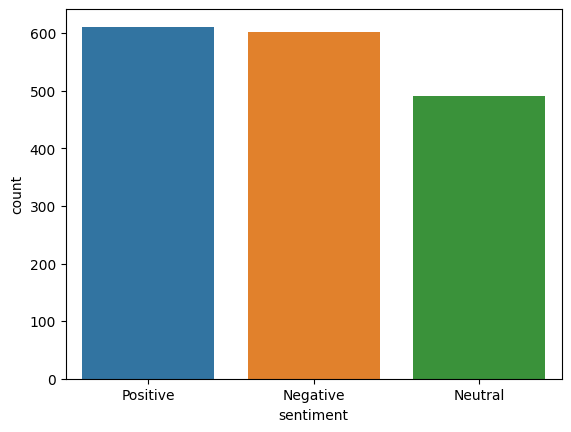

In [48]:
# Visualise the sentiment distribution
sns.countplot(x ='sentiment', data = df_comment)